In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('immobiliers_2.csv')

In [3]:
df.head()

,Type de bien,Localisation,Annonce,Configuration des pièces,Type de transaction,Salles de bains,Superficie,Prix,Chambres
0,NaN,Ariana,A vendre un appartement de 150m² en S+3 à Ennasr,S+3,À Vendre,3,150,400000.0,3
1,NaN,Nabeul,Studio encours de construction à cité Mirdès 2...,NaN,À Vendre,1,60,125000.0,1
2,NaN,Ariana,A louer un appartement en S+1 à Ennasr,S+1,À Louer,1,65,800.0,1
3,NaN,Ariana,A vendre une villa de 340m² sur un terrain de ...,NaN,À Vendre,3,517,1150000.0,5
4,NaN,Ariana,avendre fond de commerce,NaN,À Vendre,2,54,50516006.0,1


In [4]:
# on ne s'interesse que sur les biens à vendre
# execute right after reading the csv, marra wahda barka
df = df[df['Type de transaction'] == 'À Vendre']
df = df.drop(columns=['Type de transaction'])
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type de bien              176 non-null    object 
 1   Localisation              1640 non-null   object 
 2   Annonce                   1640 non-null   object 
 3   Configuration des pièces  578 non-null    object 
 4   Salles de bains           1640 non-null   object 
 5   Superficie                1640 non-null   object 
 6   Prix                      1390 non-null   float64
 7   Chambres                  1640 non-null   object 
dtypes: float64(1), object(7)
memory usage: 102.6+ KB
None


In [5]:
condition1 = df[(df['Configuration des pièces'].notna()) & (df['Chambres']=='False')]
# print(condition1.shape)
# 11 row où nb chambres n'est affiché que dans l'annonce

# Extraire le nombre de pièces de 'Configuration des pièces' et l'attribuer à 'Chambres'
for idx, row in condition1.iterrows():
    config_pieces = row['Configuration des pièces']
    match = re.search(r'S\+(\d+)', config_pieces)
    if match:
        df.at[idx, 'Chambres'] = int(match.group(1))

df = df.drop(columns=['Configuration des pièces']) # on n'en a plus besoin
df.tail()

,Type de bien,Localisation,Annonce,Salles de bains,Superficie,Prix,Chambres
1635,Appartement,Nabeul,Appartement (A2-3) en S+2 de 137.4 m² au deuxi...,2,137.4,345000.0,2
1636,Bureau,Ben Arous,"A vendre un bureau (B3-1) de 72,58m² au 3éme é...",1,72.58,NaN,False
1637,Bureau,Sousse,"un bureau B27 de 89,07m² au 2éme étage à Sahlo...",2,89.07,1600.0,2
1638,Appartement,Sousse,"A vendre un appartement S+2 de 96,92 m² au ...",2,96.92,310000.0,2
1639,Appartement,Sousse,"A vendre un appartement S+1 de 70,03 m² au ...",1,70.03,250000.0,1


In [6]:
# Remplacer toutes les valeurs 'False' dans les colonnes 'Superficie' et 'Chambres' par NaN
df['Superficie'] = df['Superficie'].replace(['False'], np.nan)
df['Chambres'] = df['Chambres'].replace(['False'], np.nan)

# Remplacer toutes les valeurs 'False' dans la colonne "Salles de bains" par la valeur par défaut 1
df['Salles de bains'].replace('False', 1, inplace=True)

df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce') # convertir en numérique

C:\Users\My_Computing\AppData\Local\Temp\ipykernel_15880\2422662689.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salles de bains'].replace('False', 1, inplace=True)


In [7]:
df.tail()

,Type de bien,Localisation,Annonce,Salles de bains,Superficie,Prix,Chambres
1635,Appartement,Nabeul,Appartement (A2-3) en S+2 de 137.4 m² au deuxi...,2,137.4,345000.0,2
1636,Bureau,Ben Arous,"A vendre un bureau (B3-1) de 72,58m² au 3éme é...",1,72.58,NaN,NaN
1637,Bureau,Sousse,"un bureau B27 de 89,07m² au 2éme étage à Sahlo...",2,89.07,1600.0,2
1638,Appartement,Sousse,"A vendre un appartement S+2 de 96,92 m² au ...",2,96.92,310000.0,2
1639,Appartement,Sousse,"A vendre un appartement S+1 de 70,03 m² au ...",1,70.03,250000.0,1


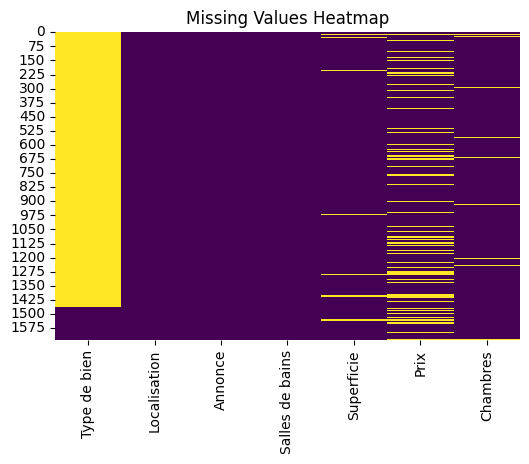

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# On s'interesse dans cette partie aux valeurs manquantes dans la colonne type de biens
print("Value counts for 'Type de bien':\n", df['Type de bien'].value_counts())
print("Missing values in 'Type de bien' column: ", df['Type de bien'].isnull().sum())

Value counts for 'Type de bien':
 Type de bien
Appartement         117
Bureau               18
Villa                15
Local Commercial     15
Duplexe               9
Penthouse             2
Name: count, dtype: int64
Missing values in 'Type de bien' column:  1464


In [10]:
keywords = {
    'appartement': 'Appartement',
    'maison': 'Appartement',
    'villa': 'Villa',
    'duplex': 'Villa',
    'studio': 'Studio',
    'local': 'Local',
    'fond de commerce': 'Local',
    'bureau': 'Bureau',
    'immeuble': 'Immeuble',
}
# chercher dans les annonces les keywords qui nous interessent
for keyword, replacement in keywords.items():
    condition = df['Annonce'].str.contains(keyword, case=False, na=False)
    df.loc[condition & df['Type de bien'].isna(), 'Type de bien'] = replacement

In [11]:
# suite aux observations, les données non labelisées correspondent à des appartements
df.loc[df['Type de bien'].isna() & df['Chambres'].notna(), 'Type de bien'] = 'Appartement'

In [12]:
# verification
print("Value counts for 'Type de bien':\n", df['Type de bien'].value_counts())
print("Missing values in 'Type de bien' column: ", df['Type de bien'].isnull().sum())

Value counts for 'Type de bien':
 Type de bien
Appartement         1097
Villa                364
Local                 54
Bureau                47
Immeuble              23
Local Commercial      15
Studio                 9
Duplexe                9
Penthouse              2
Name: count, dtype: int64
Missing values in 'Type de bien' column:  20


In [13]:
# Apres la visualtion des nvlles données, on a remarqué que les données 
# manquantes restantes dans la colonne 'Type de bien' sont des
# biens commerciaux dont on n'aura pas besoin reellement

# Garder uniquement les lignes où 'Type de bien' est 'appartement' ou 'villa'
df = df[df['Type de bien'].isin(['Appartement', 'Villa'])]

df = df.drop(columns=['Annonce']) # on n'en a plus besoin

In [14]:
df.head()

,Type de bien,Localisation,Salles de bains,Superficie,Prix,Chambres
0,Appartement,Ariana,3,150,400000.0,3
2,Villa,Ariana,3,517,1150000.0,5
4,Villa,Nabeul,4,485,890000.0,4
5,Villa,Nabeul,3,845000,NaN,4
7,Appartement,Sfax,2,128,276000.0,2


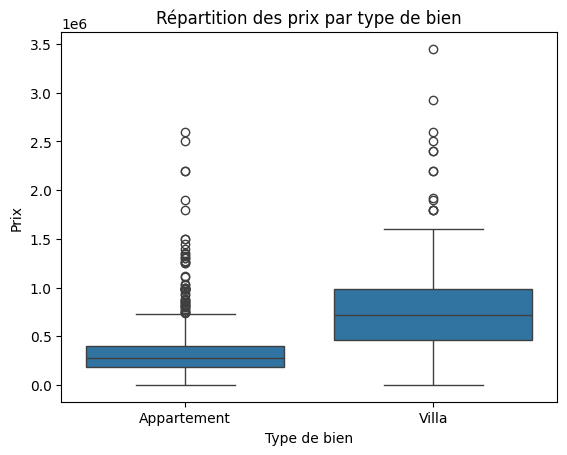

In [15]:
q99 = df['Prix'].quantile(0.99)
filtered_df = df[df['Prix'] <= q99]

sns.boxplot(x='Type de bien', y='Prix', data=filtered_df)
plt.title("Répartition des prix par type de bien")
plt.xlabel("Type de bien")
plt.ylabel("Prix")
plt.show()

In [16]:
# Imputation basée sur la médiane des prix groupée par Localisation, Nombre de chambres, et Type de bien
df['Prix'] = df.groupby(['Localisation', 'Chambres', 'Type de bien'])['Prix'].transform(
    lambda x: x.fillna(x.median())
)
df['Prix'] = df.groupby(['Localisation', 'Chambres'])['Prix'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\My_Computing\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  

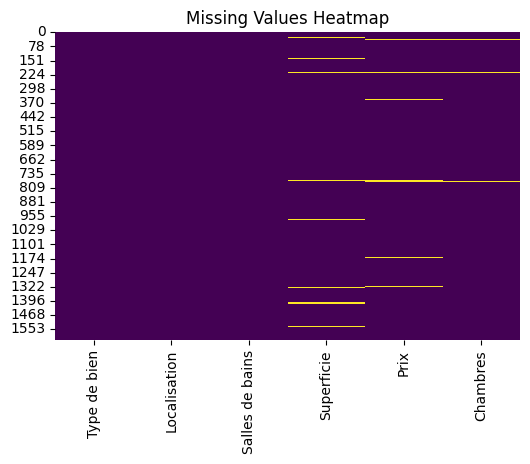

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
# supprimer les annonces sans détails
df.dropna(subset=['Prix', 'Chambres', 'Superficie'], inplace=True)

In [19]:
# garder que l'intervalle logique du nombre de chambres
df['Chambres'] = pd.to_numeric(df['Chambres'], errors='coerce')
df = df[(df['Chambres'] >= 0) & (df['Chambres'] <= 14)]
# print(df['Chambres'].unique())

In [20]:
df.to_csv('cleaned_immobiliers.csv', index=False, encoding='utf-8')